In [69]:
pwd

"C:\\Users\\CEA\\Downloads\\ANN's"

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
data = pd.read_csv('Titanic dataset (1).csv')

In [72]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [73]:
data.shape

(891, 12)

In [74]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above info we can see that the data is missing in columns Age, Cabin, Embarked

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


From the above description we can see that there is possibility of outliers in Age and fare

In [77]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


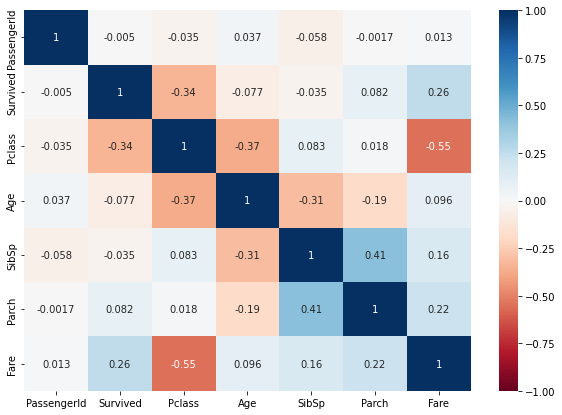

In [78]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), vmax=1, vmin=-1, annot=True, cmap='RdBu')
plt.show()

## Explore the target variable

0    549
1    342
Name: Survived, dtype: int64


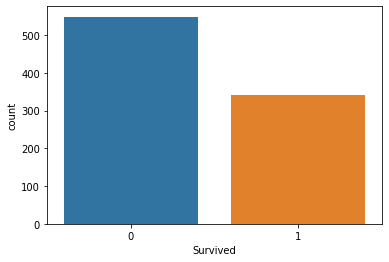

In [79]:
print(data['Survived'].value_counts())
sns.countplot(data['Survived'])
plt.show()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

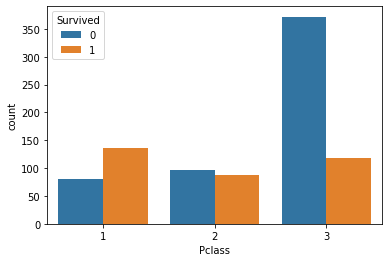

In [80]:
sns.countplot(x=data['Pclass'], hue=data['Survived'])
data.groupby(by=['Pclass','Survived'])['Pclass'].count()

In [81]:
grp_data = data.groupby(by=['Pclass','Survived'])['Pclass'].count()

In [82]:
print('% Survived in 1st Class',((grp_data[1][1])/(grp_data[1][1]+grp_data[1][0]))*100)
print('% Survived in 2nd Class',((grp_data[2][1])/(grp_data[2][1]+grp_data[2][0]))*100)
print('% Survived in 3rd Class',((grp_data[3][1])/(grp_data[3][1]+grp_data[3][0]))*100)

% Survived in 1st Class 62.96296296296296
% Survived in 2nd Class 47.28260869565217
% Survived in 3rd Class 24.236252545824847


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

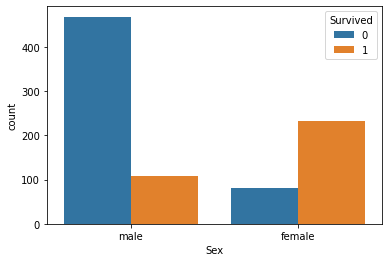

In [83]:
sns.countplot(x=data['Sex'], hue=data['Survived'])
data.groupby(by=['Sex','Survived'])['Sex'].count()

In [84]:
gender = data.groupby(by=['Sex','Survived'])['Sex'].count()

In [85]:
print('% survived female',(gender['female'][1]/(gender['female'][1]+gender['female'][0]))*100)
print('% survived male',(gender['male'][1]/(gender['male'][1]+gender['male'][0]))*100)

% survived female 74.20382165605095
% survived male 18.890814558058924


Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Embarked, dtype: int64

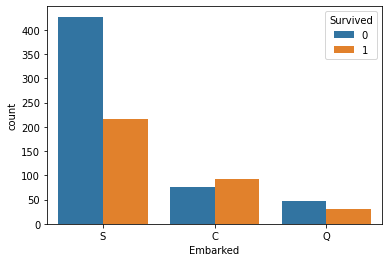

In [86]:
sns.countplot(x=data['Embarked'], hue=data['Survived'])
data.groupby(by=['Embarked','Survived'])['Embarked'].count()

In [87]:
from statsmodels.stats.weightstats import ztest

In [88]:
sample_a = data[data['Survived']==0]['Fare']
sample_b = data[data['Survived']==1]['Fare']

In [89]:
# Ho: The samples are same (Mu0==Mu1)
# Ha: The samples are different (Mu0!=Mu1)

In [90]:
z_val,p_value = ztest(x1=sample_a, x2=sample_b)
alpha = 0.05
print('Z score: %.2f\nP value: %f'%(z_val,p_value))
if p_value>alpha:
    print('We cant reject the Ho: or The samples are same')
else:
    print('We have to reject the Ho: or The samples are different')

Z score: -7.94
P value: 0.000000
We have to reject the Ho: or The samples are different


# Detect and treat the Missing values

In [91]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [92]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [93]:
data.groupby(by=['Pclass','Embarked'])['Fare'].median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [94]:
data['Embarked'].fillna('C', inplace=True)

In [95]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [96]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [97]:
data.groupby(by=['SibSp','Parch'])['Age'].median()

SibSp  Parch
0      0        29.5
       1        27.0
       2        20.5
       3        24.0
       4        29.0
       5        40.0
1      0        30.0
       1        30.5
       2        24.0
       3        48.0
       4        45.0
       5        39.0
       6        43.0
2      0        28.0
       1         4.0
       2        19.5
       3        24.0
3      0        31.5
       1         3.0
       2        10.0
4      1         7.0
       2         6.0
5      2        11.0
8      2         NaN
Name: Age, dtype: float64

In [98]:
data['Age'].median()

28.0

<AxesSubplot:xlabel='SibSp', ylabel='count'>

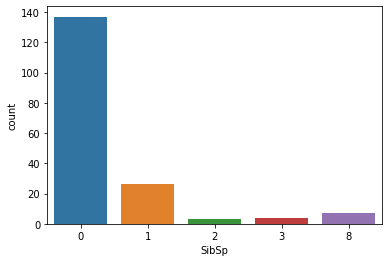

In [99]:
age_missing = data[data['Age'].isnull()]
sns.countplot(x =age_missing['SibSp'] )

In [100]:
data['Age'].fillna(28.0, inplace=True)

In [101]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [102]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin          77.104377
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
dtype: float64

In [103]:
# Since 77% of data is missing in cabin we can delete this column
del data['Cabin']

In [104]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

## Outlier Detection and Treatment

<AxesSubplot:xlabel='Fare'>

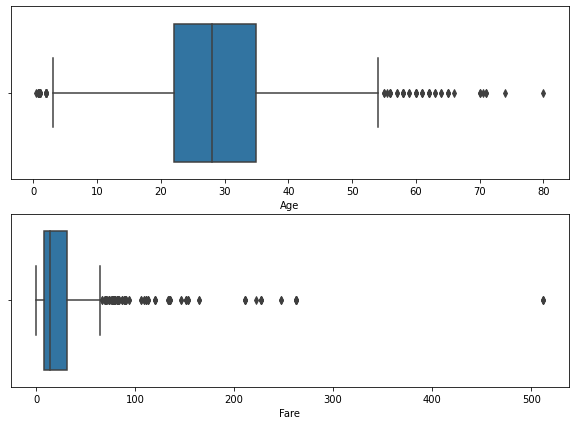

In [105]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.boxplot(data['Age'])
plt.subplot(2,1,2)
sns.boxplot(data['Fare'])

In [106]:
data[data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [107]:
data[(data['Pclass']==1)&(data['Embarked']=='C')]['Fare'].median()

79.2

In [108]:
data.drop(index=data[data['Fare']>500].index, inplace=True)

<AxesSubplot:xlabel='Fare'>

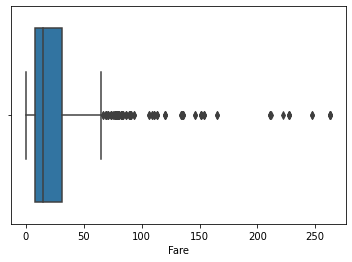

In [109]:

sns.boxplot(data['Fare'])

## Feature Selection

In [110]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [111]:
data.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [112]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Feature Engineering

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [114]:
data['Sex'] = le.fit_transform(data['Sex'])

In [115]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [116]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [117]:
#ohe.fit(np.reshape(data['Embarked'].shape[0],(-1,1)))
#data['Embarked'] = ohe.transform(data['Embarked']).toarray()

In [118]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [119]:
data = pd.get_dummies(data, drop_first=True)

In [120]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


## Train Test Split

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x = data.drop(columns=['Survived'])
y = data['Survived']

In [123]:
x_train,x_test, y_train, y_test = train_test_split(x,y, stratify=y, train_size=0.8, random_state=2)

In [124]:
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(710, 8) (178, 8) (710,) (178,)


## Neural Network

In [125]:
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Activation

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [127]:
model = Sequential()
model.add(Dense(16,input_dim = 8, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu')) 
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [128]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [129]:
history=model.fit(x_train,y_train,epochs=500,batch_size=800,verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 910ms/step - loss: 1.8611 - accuracy: 0.3268
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 1.5386 - accuracy: 0.3225
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 1.3615 - accuracy: 0.3169
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2337 - accuracy: 0.3113
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 1.1332 - accuracy: 0.3155
Epoch 6/500
1/1 [==============================] - 0s 24ms/step - loss: 1.0519 - accuracy: 0.3127
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.9836 - accuracy: 0.3113
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 0.9278 - accuracy: 0.3282
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 0.8812 - accuracy: 0.3310
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 0.8407 - accuracy: 0.3296
Epoch 11/500
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 0.5896 - accuracy: 0.6817
Epoch 85/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5878 - accuracy: 0.6817
Epoch 86/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5871 - accuracy: 0.6859
Epoch 87/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5860 - accuracy: 0.6887
Epoch 88/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5859 - accuracy: 0.6887
Epoch 89/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5850 - accuracy: 0.6887
Epoch 90/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5857 - accuracy: 0.6887
Epoch 91/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5854 - accuracy: 0.6930
Epoch 92/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5863 - accuracy: 0.6859
Epoch 93/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5859 - accuracy: 0.6845
Epoch 94/500
1/1 [============

1/1 [==============================] - 0s 7ms/step - loss: 0.5331 - accuracy: 0.7479
Epoch 249/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5322 - accuracy: 0.7310
Epoch 250/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.7479
Epoch 251/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5312 - accuracy: 0.7310
Epoch 252/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5320 - accuracy: 0.7479
Epoch 253/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5296 - accuracy: 0.7338
Epoch 254/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5299 - accuracy: 0.7437
Epoch 255/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5280 - accuracy: 0.7324
Epoch 256/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5284 - accuracy: 0.7437
Epoch 257/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5269 - accuracy: 0.7380
Epoch 258/500
1/1 [====

1/1 [==============================] - 0s 8ms/step - loss: 0.4919 - accuracy: 0.7817
Epoch 413/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4888 - accuracy: 0.7563
Epoch 414/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4889 - accuracy: 0.7845
Epoch 415/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.7563
Epoch 416/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4895 - accuracy: 0.7859
Epoch 417/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7577
Epoch 418/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7831
Epoch 419/500
1/1 [==============================] - 0s 19ms/step - loss: 0.4862 - accuracy: 0.7577
Epoch 420/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4860 - accuracy: 0.7817
Epoch 421/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4847 - accuracy: 0.7592
Epoch 422/500
1/1 [====

In [130]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

Text(0, 0.5, '%age')

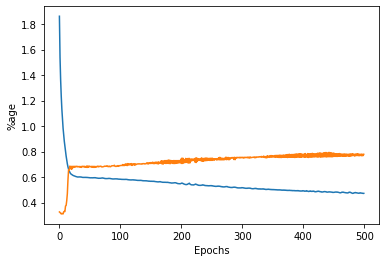

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('%age')

In [132]:
test_eval = model.evaluate(x_test,y_test,batch_size=200, verbose=1)

1/1 [==============================] - 0s 115ms/step - loss: 0.4796 - accuracy: 0.7472


In [133]:
y_pred = model.predict(x_test)

In [134]:
y_pred

array([[0.08068207],
       [0.4996339 ],
       [0.19392186],
       [0.1552147 ],
       [0.43133277],
       [0.09079856],
       [0.71914065],
       [0.42322156],
       [0.09079304],
       [0.0890739 ],
       [0.15076435],
       [0.4709944 ],
       [0.10892454],
       [0.03306931],
       [0.4853234 ],
       [0.24489269],
       [0.1279428 ],
       [0.12551615],
       [0.07858467],
       [0.54575163],
       [0.45938957],
       [0.15599239],
       [0.07514083],
       [0.53701556],
       [0.7734778 ],
       [0.7202591 ],
       [0.21725154],
       [0.45761892],
       [0.760254  ],
       [0.03707379],
       [0.1021969 ],
       [0.4394202 ],
       [0.54380214],
       [0.64156145],
       [0.1698178 ],
       [0.46786827],
       [0.5519662 ],
       [0.43467546],
       [0.10795939],
       [0.16616648],
       [0.10254675],
       [0.6284182 ],
       [0.13272277],
       [0.6687756 ],
       [0.35869676],
       [0.47600037],
       [0.37390333],
       [0.467

In [135]:
y_pred_hard= np.round(y_pred).astype(int)

In [136]:
print('Accuracy: ',accuracy_score(y_test,y_pred_hard))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_hard))
print('F1 Score: ',f1_score(y_test,y_pred_hard))

Accuracy:  0.7471910112359551
Confusion Matrix:
 [[102   8]
 [ 37  31]]
F1 Score:  0.5794392523364486
